In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df

df = df.drop(["Income", "Education", "CholCheck", "DiffWalk", "AnyHealthcare", "NoDocbcCost", "MentHlth", "PhysHlth"], axis= 1)
df

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,5.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,11.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,7.0


In [3]:
#df.iloc[:,0]
df.iloc[:,1:13]

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,Sex
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0
1,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
2,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0
3,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0
4,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0
253676,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
253677,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
253678,1.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0


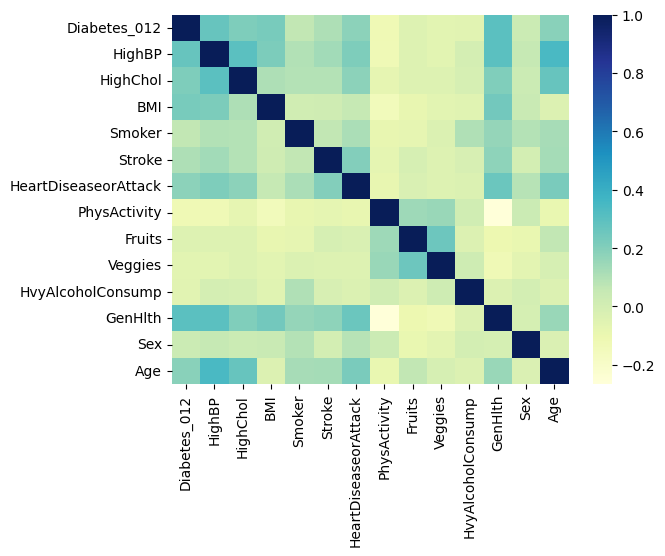

In [4]:

corr = df.corr()

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False) 


In [21]:
# Solution
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

X = df.iloc[:,1:13]
y = df.iloc[:,0]

kf = KFold(5)

# Initialize lists to store results
variances = []
biases = []
total_error = []    
models = []

# Set the polynomial degree of the model
poly_features = PolynomialFeatures(1)
X_poly = poly_features.fit_transform(X)

# Perform cross-validation
for train_index, test_index in kf.split(X_poly):
    # Split data into training and testing sets for this fold
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate variance and R^2 for this fold
    variance = np.mean((np.mean(y_pred) - y_pred) ** 2)
    bias2 = np.mean((np.mean(y_pred) - y_test) ** 2)

    # Append results to lists
    variances.append(variance)
    biases.append(bias2)
    total_error.append(bias2 + variance)
    models.append(model)

    # Print results for this fold
    #print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(variance, bias2, bias2 + variance))

min_error_index = np.argmin(total_error)
best_model = models[min_error_index]
print("Selected model's Total reducible error:{}".format(total_error[min_error_index]))


# Testing the final model on the test data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.25, random_state=42)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
    
y_t = best_model.predict(X_test)




Variance: 0.0788, Bias2: 0.4836, Total error: 0.5624
Variance: 0.0870, Bias2: 0.4952, Total error: 0.5821
Variance: 0.0766, Bias2: 0.4645, Total error: 0.5411
Variance: 0.0783, Bias2: 0.5005, Total error: 0.5789
Variance: 0.0784, Bias2: 0.4935, Total error: 0.5719
Selected model's Total reducible error:0.5411353085396818
[[1. 0. 0. ... 0. 3. 0.]
 [1. 1. 1. ... 0. 3. 0.]
 [1. 0. 0. ... 0. 1. 1.]
 ...
 [1. 0. 0. ... 0. 4. 0.]
 [1. 0. 0. ... 0. 2. 1.]
 [1. 0. 0. ... 0. 1. 0.]]
[ 0.11704014  0.5147167  -0.09482147 ...  0.43105113  0.08917018
 -0.16515499]
